In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import datetime as dt

C:\Users\user\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#Setting start date as 1st April 2010 and end date as 1st April 2020
start=dt.datetime(2010,4,1)
end=dt.datetime(2020,4,1)

In [3]:
tickers=['GOOGL','MSFT','AMZN','AAPL']
mydata=pd.DataFrame()
for t in tickers:
    mydata[t]=wb.DataReader(t,"yahoo",start,end)['Adj Close']

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2519 entries, 2010-03-31 to 2020-04-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOGL   2519 non-null   float64
 1   MSFT    2519 non-null   float64
 2   AMZN    2519 non-null   float64
 3   AAPL    2519 non-null   float64
dtypes: float64(4)
memory usage: 98.4 KB


In [5]:
mydata.head()

,GOOGL,MSFT,AMZN,AAPL
Date,,,,
2010-03-31,283.843842,23.098850,135.770004,29.141371
2010-04-01,284.684692,22.996336,131.809998,29.261658
2010-04-05,285.790802,23.083084,131.490005,29.574146
2010-04-06,284.394409,23.122520,135.559998,29.704361
2010-04-07,282.052063,23.146170,134.869995,29.835800


In [6]:
mydata.tail()

,GOOGL,MSFT,AMZN,AAPL
Date,,,,
2020-03-26,1162.920044,156.110001,1955.489990,258.440002
2020-03-27,1110.260010,149.699997,1900.099976,247.740005
2020-03-30,1146.310059,160.229996,1963.949951,254.809998
2020-03-31,1161.949951,157.710007,1949.719971,254.289993
2020-04-01,1102.099976,152.110001,1907.699951,240.910004


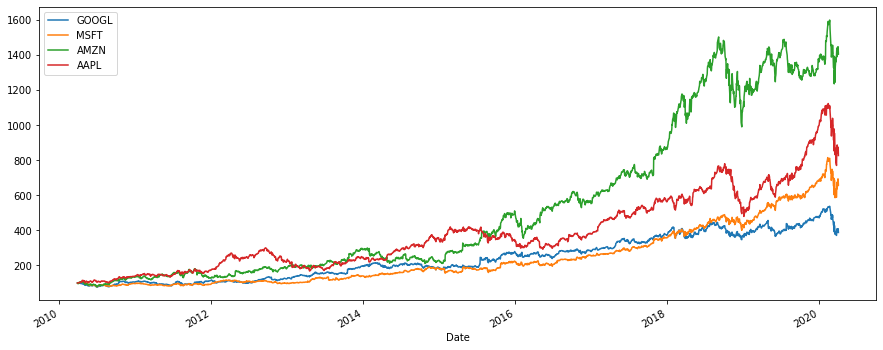

In [7]:
#Normalizing the data to 100 to get the same starting point for all stocks and then plotting the the graph
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6))
plt.show()

# Calculating the Returns of the portfolio:

In [8]:
#Using simple return method as it is prefered for a portfolio
returns=(mydata/mydata.shift(1))-1
returns.head()

,GOOGL,MSFT,AMZN,AAPL
Date,,,,
2010-03-31,NaN,NaN,NaN,NaN
2010-04-01,0.002962,-0.004438,-0.029167,0.004128
2010-04-05,0.003885,0.003772,-0.002428,0.010679
2010-04-06,-0.004886,0.001708,0.030953,0.004403
2010-04-07,-0.008236,0.001023,-0.005090,0.004425


In [9]:
#Calculating the annual returns of each stock
annual_returns=returns.mean()*250
annual_returns

GOOGL    0.167053
MSFT     0.218264
AMZN     0.311357
AAPL     0.247300
dtype: float64

In [10]:
#Considering the weights of each stock are equal in the portfolio
weights=np.array([0.25,0.25,0.25,0.25])

In [11]:
#Calculating the annual return of the portfolio
np.dot(annual_returns,weights)

0.23599357041013844

In [12]:
pfolio_1= str(round(np.dot(annual_returns,weights),2)*100) +'%'

In [13]:
print(pfolio_1)

24.0%


In [14]:
#Considering a different portfolio with the same stocks but different weights
#Randomly chosen the weights
weights_2=np.array([0.05,0.15,0.4,0.4])

In [15]:
pfolio_2= str(round(np.dot(annual_returns,weights_2),2)*100) +'%'
print(pfolio_2)

26.0%
